<a href="https://colab.research.google.com/github/Shivprasad-Rao/SentimentAnalysis-LLM_NaiveBayes_LogisticRegression_NeuralNetwork/blob/main/SentimentAnalysis_GoogleGemini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("/content/drive/MyDrive/CSCI264-ProjectFiles/IMDB Dataset.csv")

In [ ]:
import pathlib
import textwrap

from IPython.display import display
from IPython.display import Markdown

import google.generativeai as genai
from google.colab import userdata

safety_settings=[
  {
    "category": "HARM_CATEGORY_DANGEROUS",
    "threshold": "BLOCK_NONE",
  },
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_NONE",
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_NONE",
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_NONE",
  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_NONE",
  }
]

genai.configure(api_key=userdata.get('GEMINI_API'))

model = genai.GenerativeModel(model_name = 'gemini-pro', safety_settings = safety_settings)

In [ ]:
data_set = 10
data = data.loc[:(data_set-1)]
print(len(data))

10


In [ ]:
import re
from nltk.stem.porter import PorterStemmer
porter=PorterStemmer()

def preprocessor(text):
             text=re.sub('<[^>]*>','',text)
             emojis=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
             text=re.sub('[\W]+',' ',text.lower()) + ' '.join(emojis).replace('-','')
             return text

data['review']=data['review'].apply(preprocessor)

In [ ]:
y_test = data.sentiment.values
y_pred = []
samples = 0

In [ ]:
for text in data['review']:
  samples = samples + 1
  if(samples%1==0):
    print(samples, "/", data_set)
  response = model.generate_content("Analyze the sentiment of the following text and respond in only positive or negative, all lowercase: " + text)

  try:
    if(response.text in ['positive','negative']):
      y_pred.append(response.text)
    else:
      y_pred.append('positive')
  except:
    y_pred.append('negative')
    print(response.prompt_feedback)

1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10


In [ ]:
for i, x in enumerate(y_pred):
  if x not in ["positive", "negative"]:
    print(i)

Accuracy(%):  100.0


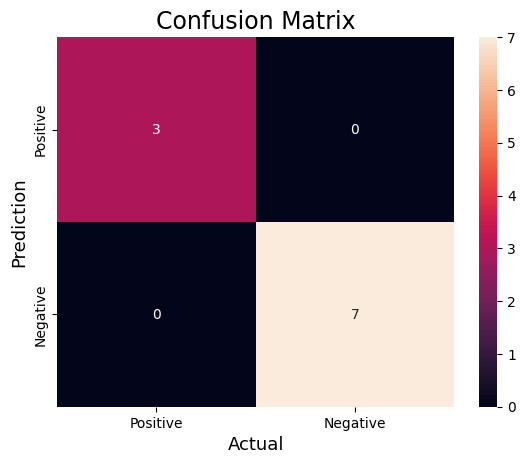

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)

print("Accuracy(%): ",accuracy*100)


sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Positive','Negative'],
            yticklabels=['Positive','Negative'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()